輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以台東縣立委劉櫂豪為例，建立發文文字斷詞表

---



In [2]:
liu = fb[fb.page_name == "愛信任-劉世芳"]
liu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
21640,879078268822395_2259877347409140,879078268822395,愛信任-劉世芳,政治人物,最近的「加辣事件」大家應該對家暴很有感⋯\n\n保護孩子，我時常提醒身邊朋友，遇到疑似家暴行為，#雞婆一點，或許你救了他一命、幫助他們的家庭納入社會安全網。\n\n#113 #113 #113家暴通報專線\n➡️衛福部說明：https://goo.gl/rzL62g\n#老人保護\n#身心障礙者保護\n#性騷擾事件通報,NaN,photo,https://www.facebook.com/879078268822395/posts/2259877347409140/,2019-01-15T00:02:54+0000,2019-01-15T08:02:54,...,NaN,NaN,85,0,0,0,0,0,46,4


In [3]:
liu['new_date'] = pd.to_datetime(liu['created_time_taipei']).dt.date
liu['month_year'] = pd.to_datetime(liu['new_date']).dt.to_period('M')
liu.head(1)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
21640,879078268822395_2259877347409140,879078268822395,愛信任-劉世芳,政治人物,最近的「加辣事件」大家應該對家暴很有感⋯\n\n保護孩子，我時常提醒身邊朋友，遇到疑似家暴行為，#雞婆一點，或許你救了他一命、幫助他們的家庭納入社會安全網。\n\n#113 #113 #113家暴通報專線\n➡️衛福部說明：https://goo.gl/rzL62g\n#老人保護\n#身心障礙者保護\n#性騷擾事件通報,NaN,photo,https://www.facebook.com/879078268822395/posts/2259877347409140/,2019-01-15T00:02:54+0000,2019-01-15T08:02:54,...,85,0,0,0,0,0,46,4,2019-01-15,2019-01


In [4]:
# 依照按讚數 低到高排序
liu = liu.sort_values(by=['like_count'])
# 用新的排序當作順序
liu.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [5]:
doc_names = range(len(liu)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 444)

In [6]:
liu = liu.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(liu['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [7]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.030 seconds.
Prefix dict has been built successfully.


['暖冬', '補助', '，', '好', '評延長', '中', '！', '\n', '趕快', '規劃', '要', '去', '台灣', '的', '哪裡', '玩', '囉', '。', '\n', '\n', '日前', '因活動', '踴躍', '造成', '案件', '量', '增加', '，', '已經', '緊急', '修正', '，', '並且', '將申', '請', '送件', '期限', '最', '晚', '延至', '3', '月', '31', '日止', '，', '\n', '未來', '將繼續', '研擬', '補助', '方案', '，', '消費者', '、', '業者', '等', '多贏', '局面', '，', '一起', '共同', '帶動', '地方', '經濟', '的', '繁榮', '！']


In [8]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x7f50c32cc620>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [10]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
liu_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
liu_docs['jieba_results'] = liu_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    liu_docs = liu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [11]:
#liu_docs.iloc[400:,]  #從讚數最多的檢查

In [12]:
liu['jieba_results'] = liu_docs
liu_post = liu[['new_date','message','jieba_results','like_count']]
liu_post

,new_date,message,jieba_results,like_count
0,2019-03-01,暖冬補助，好評延長中！\n趕快規劃要去台灣的哪裡玩囉。\n\n日前因活動踴躍造成案件量增加，已經緊急修正，並且將申請送件期限最晚延至3月31日止，\n未來將繼續研擬補助方案，消費者、業者等多贏局面，一起共同帶動地方經濟的繁榮！,暖冬 補助 好 評延長 中 趕快 規劃 要 去 台灣 的 哪裡 玩 囉 日前 因活動 踴躍 造成 案件 量 增加 已經 緊急 修正 並且 將申 請 送件 期限 最 晚 延至 月 日止 未來將 繼續 研擬 補助 方案 消費者 業者 等 多贏 局面 一起 共同 帶動 地方 經濟 的 繁榮,59
1,2019-03-08,我正在東森-<雲端最前線>直播，點下連結可收看。\n\n今日議題:#酒駕,我 正在 東森 雲端 最 前線 直播 點下 連結 可 收看 今日 議題 酒駕,71
2,2019-02-18,今天參加 #行政立法協調會報，討論本會期優先法案。\n行政部門提出44案，重大議題方面，有防止兒虐相關的法案，包括將修正刑法部分條文，加重處罰凌虐幼童致死、致重傷；教師法修正案完善不適任教師的處理機制；修正兒福法和家庭教育法，以預防兒虐事件發生等。\n\n部分亦提出二修正案：\n提高酒駕刑度：道路交通管理處罰條例條文第35條、第35條之1、第35條之2、第67條修正。\n兒虐刑度：刑法增訂第286條處罰凌虐幼童致死、致重傷之加重結果犯。\n\n另外包含司法改革：《法官法》修正案 #淘汰不適任法官,今天 參加 行政 立法 協調 會報 討論 本會期 優先 法案 行政部 門 提出 案 重大 議題 方面 有 防止 兒虐 相關 的 法案 包括 將 修正 刑法 部分 條文 加重 處罰 凌虐 幼童 致死 致重傷 教師法 修正案 完善 不適 任教 師的 處理 機制 修正 兒福法 和 家庭教育 法 以 預防 兒虐 事件 發生 等 部分 亦 提出 二 修正案 提高 酒駕 刑度 道路交通 管理 處罰 條例 條文 第 條 第 條之 第 條之 第 條 修正 兒虐 刑度 刑法 增訂 第 條處 罰 凌虐 幼童 致死 致重傷 之 加重 結果 犯 另外 包含 司法 改革 《 法官法 修正案 淘汰 不 適任 法官,71
3,2019-08-26,#世芳教英文\n\n今晚有一位來自Navy、一位Air force的小兄弟officers來陳情，事關MND形象，需要Legislative staffers來協助。,世芳 教 英文 今晚 有 一位 來 自 一位 的 小兄弟 來陳情 事關 形象 需要 來 協助,72
4,2019-01-04,各位晚安。今晚來聊一下⋯\n是時候要 #滾動式檢討 #公務人員退休法令 了。\n\n這陣子立院雖忙，但持續中央、地方走動，不斷有朋友和我反應年金改革問題，我將邀集軍、公、教朋友請教！第77條和78條條文已有資深公教同仁提出修正建議：討論再任者及特殊專長者之修正。\n\n請先参考！歡迎各位提供意見。,各位 晚安 今晚 來聊 一下 是 時候 要 滾動式 檢討 公務人員 退休 法令 了 這陣子 立院 雖忙 但 持續 中央 地方 走動 不斷 有 朋友 和 我 反應 年 金 改革 問題 我將 邀集 軍 公 教 朋友 請教 第 條和 條條文 已有 資深 公教 同仁 提出 修正 建議 討論 再 任者 及 特殊 專長 者 之 修正 請 先 参考 歡迎 各位 提供 意見,72
...,...,...,...,...
439,2019-09-24,#辣台姐妹派\n\n下午陪同 蔡英文 Tsai Ing-wen總統來到左營元帝廟、後勁鳳屏宮參拜， 陳菊(花媽) 秘書長、 李昆澤 立委 、前內政部長余政憲也一同參拜。現場也有 李柏毅＠左楠 、 主婦政治力 李雅慧、 黃文志-志在為您 議員、當地里長許許多多熱情的左楠鄉親，給小英加油、給世芳溫暖！\n\n這次2020，請相信、也請支持我們辣台姐妹派，未來共同為高雄發展、為國家來努力！\n\n#2020台灣要贏\n#letswin\n#我們都是辣台派,辣台 姐妹 派 下午 陪同 蔡英文 總統 來 到 左營元帝廟 後勁鳳屏宮 參拜 陳 菊 花媽 秘書長 李昆澤 立委 前內 政部長 余政憲 也 一同 參拜 現場 也 有 李柏毅 左楠 主婦 政治 力 李雅慧 黃 文志 志在 為 您 議員 當 地里 長 許許 多多 熱情 的 左楠 鄉親 給小英 加油 給 世芳 溫暖 這次 請 相信 也 請 支持 我們 辣台 姐妹 派 未來 共同 為 高雄 發展 為 國家 來 努力 台灣 要贏 我們 都 是 辣台 派,3163
440,2019-10-13,歡迎歸隊！\n\n記得這句話嗎？\n\n「⋯從政者只要真誠無私的為人民做事，人民就會給你掌聲⋯」-賴清德,歡迎 歸隊 記得 這句 話 嗎 從 政者 只要 真誠無私 的 為 人民 做事 人民 就會給 你 掌聲 賴清德,3258
441,2019-09-06,北柯南瑜\n天下無（）\n\n#以下開放大家填字,北柯南瑜 天下 無 以下 開放 大家 填字,4304
442,2019-11-28,【2020總統唯一支持蔡英文、立委懇求牽成劉世芳】\n\n很感謝，今天所有到場的鄉親長輩，展現出咱高雄人的熱情！承蒙感謝大家一路以來的支持，讓世芳與小英總統可以為大家來打拼！\n\n我想，今天在楠梓援中港代天府、右昌三山國王府的面前，將民進黨的執政來的的成績單，不敢說會做多少事，但絕對是會做事、且有效率，三年多來大破大立，推動各項改革、有感政策，全是為全國人民造福！\n\n在我們楠梓延宕10幾年的新台17線、橋頭新市鎮荒廢近20幾年，但在中央的支持下，這些都有嶄新的突破，我們攜手完成別人做不到的事，也為高雄、為台灣的未來努力建立基石！現在改革不能斷，更重要的要讓小英總統連任、國會更要過半！\n\n所以，世芳要拜託所有鄉親、長輩以及市民朋友，2020懇請堅定唯一支持會做事、守護台灣民主自由的政黨，總統支持 蔡英文 Tsai Ing-wen Ing-wen、立委牽成劉世芳，政黨票民主進步黨！\n\n最後，也要特別感謝 陳菊(花媽)秘書長、余政憲前縣長、李柏毅＠左楠、主婦政治力 李雅慧、黃文志-志在為您、李清讚董事長、陳善慧主委今日的陪同，未來，我們作伙贏！\n\n#總統支持蔡英文\n#左營楠梓愛信任劉世芳\n#改革不能斷國會要過半\n#政黨票民主進步黨,總統 唯一 支持 蔡英文 立委 懇求 牽成劉 世芳 很 感謝 今天 所有 到場 的 鄉親 長 輩 展現 出 咱 高雄人 的 熱情 承蒙 感謝 大家 一路 以來 的 支持 讓 世芳 與 小英總統 可以 為 大家 來 打拼 我 想 今天 在 楠梓 援 中港 代 天府 右昌 三山國王府 的 面前 將民進 黨 的 執政來 的 的 成績 單 不敢 說會 做 多少 事 但絕 對 是 會 做事 且 有效率 三年 多來 大破大立 推動 各項 改革 有感 政策 全是 為 全國 人民 造福 在 我們 楠梓 延宕 幾年 的 新台 線 橋頭 新市 鎮荒 廢近 幾年 但 在 中央 的 支持 下 這些 都 有 嶄 新 的 突破 我們 攜手 完成 別人 做 不到 的 事 也 為 高雄 為 台灣 的 未來 努力 建立 基石 現在 改革 不能 斷 更 重要 的 要 讓 小英總統 連任 國會 更 要 過半 所以 世芳 要 拜 託 所有 鄉親 長 輩 以及 市民 朋友 懇請 堅定 唯一 支持 會 做事 守護 台灣 民主自由 的 政黨 總統 支持 蔡英文 立委 牽成劉 世芳 政黨票 民主 進步 黨 最 後 也 要 特別 感謝 陳 菊 花媽 秘書長 余政憲 前縣 長 李柏毅 左楠 主婦 政治 力 李雅慧 黃 文志 志在 為 您 李 清 讚 董事 長 陳 善慧 主委 今日 的 陪同 未來 我們 作伙 贏 總統 支持 蔡英文 左營 楠梓 愛 信任 劉 世芳 改革 不能 斷國會 要 過半 政黨票 民主 進步 黨,5014


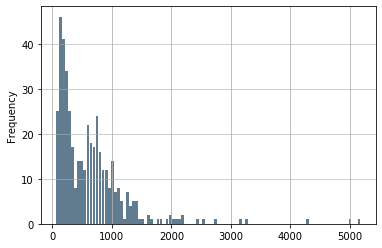

In [13]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = liu_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [14]:
temp = liu_post[(liu_post['like_count'] <= 500) & (liu_post['like_count'] > 100)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
19,2019-02-16,在新民國小送鄉親開心出遊後，我與同仁到果貿祭五臟廟，一早就大排長龍！果貿社區前一位老奶奶希望我們協助她勞保問題，她並提醒多注意老人家走路不要被樹枝或磗塊絆到，四年前社區劉前理事長請求協助，我協調市府處理黑板樹亂竄根的問題，感謝養工處，以不傷害樹體的情況下謹慎處理。,在 新民 國小 送 鄉親 開心 出遊 後 我 與 同仁 到 果貿 祭五臟廟 一 早就 大排 長 龍 果貿 社區 前 一位 老奶奶 希望 我們 協助 她 勞保 問題 她並 提醒 多 注意 老人家 走路 不要 被 樹枝 或 磗 塊 絆 到 四年 前 社區 劉前 理事 長 請求 協助 我 協調 市府 處理 黑板 樹亂 竄 根 的 問題 感謝養 工處 以不傷 害樹體 的 情況 下 謹慎 處理,101
20,2019-01-22,直播中！世芳正在民視CH53《台灣最前線》與您見面，聊聊近日政治時事動態，歡迎點選下列網址收看直播!\n\nhttps://www.youtube.com/watch?v=XxJKnDLYZz4,直播 中 世芳 正在 民視 《 台灣 最前 線 與 您 見面 聊聊 近日 政治 時事動態 歡迎 點選 下列 網址 收看 直播,102
21,2019-04-06,民視「台灣最前線」片段分享。\n#吳韓會 #訪美面試 #總統大選2020,民視 台灣 最前 線 片段 分享 吳韓會 訪美面 試 總統 大選,102
22,2019-01-12,我基於民主理念、軍隊國家化的原則，要求陸軍官校校務會議，按大學自治精神討論⋯⋯看看影片聽聽世芳怎麼說，這不是「逼」，而是「#堅持軍隊屬於國家」！\n\n#以台灣為主體\n#歷史必須被了解與尊重\n#我們必須向前邁進,我基 於 民主 理念 軍隊 國家 化 的 原則 要求 陸 軍 官校 校務會議 按大學 自治 精神 討論 看看 影片 聽 聽 世芳 怎麼 說 這 不是 逼 而是 堅持 軍隊屬 於 國家 以 台灣 為主體 歷史 必須 被 了解 與 尊重 我們 必須 向前 邁進,107
23,2019-01-26,下午行程間趕緊休息充電，\n#哈囉市場 的炸物跟關東煮、\n還有從美濃特地來品嚐的朋友，\n就由世芳盡地主之誼為各位介紹這蚵嗲有多美味啦！,下午 行程 間 趕緊 休息 充電 哈 囉 市場 的 炸物 跟 關東 煮 還有 從 美濃 特地 來 品嚐 的 朋友 就 由 世芳 盡 地主 之誼 為 各位 介紹 這 蚵 嗲 有 多 美味 啦,108
...,...,...,...,...
215,2019-05-19,高雄型農田力精緻蔬果分享新産品，像小玉西瓜的美濃瓜/哈密瓜！香甜多汁。\n清涼又消暑，有人知道是什麼品種嗎？\n\n嚴防大豪雨，出門記得攜帶雨具喔。,高雄型 農田力 精 緻 蔬果 分享 新 産 品 像 小玉 西瓜 的 美 濃瓜 哈密瓜 香甜 多汁 清涼 又 消暑 有人 知道 是 什麼 品種 嗎 嚴防大 豪雨 出門 記得 攜帶 雨具 喔,481
216,2019-10-27,CRAZY WEEKEND！\n\n一群可愛而瘋狂的年輕人，在高雄世運大道真的玩起飆車⋯4秒内可以直線跑完世運大道！！\n\n加上全台各地大學汽車迷約100輛也聚在世運大道比賽，讓左營世運主場館的周末擠滿各地來的充滿活力的車迷！\n\n然而這些熱鬧的背後，是一群志同道合高雄在地出生的年輕朋友心血，他們籌備大半年以上，進口7000馬力的火箭賽車，連紐澤西護欄都自己準備，他們想在台灣發展，除了高雄世運大道，再來就是要去總統府前凱道了！\n\n世運大道是我們舉辦2009世界運動會開拓的筆直大道！\n\n我的主張，左楠發展成國家體育園區，一步步實踐中。,一群 可愛而 瘋狂 的 年 輕人 在 高雄 世運 大道 真的 玩起 飆車 秒 内 可以 直線 跑 完世運 大道 加上 全 台 各地 大學 汽車 迷約 輛 也 聚 在世 運 大道 比賽 讓 左營 世運主場 館 的 周末 擠滿 各地 來 的 充滿 活力 的 車迷 然而 這些 熱鬧 的 背 後 是 一群 志同道合 高雄 在 地 出生 的 年 輕 朋友 心血 他們 籌備 大半年 以上 進口 馬 力 的 火箭 賽車 連紐澤西護欄 都 自己 準備 他們 想 在 台灣 發展 除了 高雄 世運 大道 再來 就是 要 去 總統府 前凱 道 了 世運 大道 是 我們 舉辦 世界 運動會 開拓 的 筆直 大道 我 的 主張 左楠 發展 成 國家 體育 園區 一步步 實踐 中,487
217,2019-11-08,【24節氣-立冬】\n\n大家早安！今天11月8日正式進入冬季第一個節氣-立冬，早晚的溫差開始變大。提醒大家，出門時記得關心一下氣溫，攜帶薄外套出門，以免感染風寒喔！\n\n另外，今天也是冬季進補的好時機，非常適合吃麻油雞跟薑母鴨來補補身體。如果大家有吃到好吃的麻油雞或是薑母鴨，非常歡迎您拍照並在底下留言跟世芳還有小編分享喔。\n\n#冬天才是減肥好時機\n#一定要吃飽才有力氣減肥啊,節氣 立冬 大家 早安 今天 月 日 正式 進入 冬季 第一 個 節氣 立冬 早晚 的 溫差 開始 變大 提醒 大家 出門時 記得 關心 一下 氣溫 攜帶 薄 外套 出門 以免 感染 風寒 喔 另外 今天 也 是 冬季 進補 的 好 時機 非常 適合 吃 麻油 雞 跟 薑 母鴨來 補補 身體 如果 大家 有 吃 到 好吃 的 麻油 雞 或是 薑 母 鴨 非常 歡迎 您 拍照 並在 底下 留言 跟 世芳 還有 小編 分享 喔 冬天 才 是 減肥 好 時機 一定 要 吃 飽 才 有力 氣減 肥 啊,488
218,2019-11-21,世芳在新中，鄉親永遠在世芳心中\n\n晚上，在新庄仔青雲宮，很感謝大家今天熱情的捧場！今天有一群很特別的來賓，他們來自雄中，來旁聽公民參與政治的活動。我想，身為大人的我們理應身為表率，為國家未來的主人翁做為楷模，也介紹我們如何透過問政說明會來闡述自己的政見及理想，希望這群學生可以收穫滿滿！\n\n在此，也要特別感謝黃文志-志在為您議員、主婦政治力 李雅慧議員以及在地有為青年、尚年輕的里長新中里里長 黃昱誌來參與我的問政說明會，未來我們一起努力！\n\n#左營楠梓愛信任劉世芳\n#國會尚認真地方尚打拼,世芳 在 新 中 鄉親 永遠 在 世芳 心中 晚上 在 新庄 仔青雲宮 很 感謝 大家 今天 熱情 的 捧場 今天 有 一群 很特別 的 來賓 他們 來 自雄 中 來 旁 聽 公民 參與 政治 的 活動 我 想 身為 大人 的 我們 理應 身為 表率 為 國家 未來 的 主人翁 做 為 楷模 也 介紹 我們 如何 透過 問政說 明會來 闡述 自己 的 政見 及 理想 希望 這群 學生 可以 收 穫 滿滿 在 此 也 要 特別 感謝 黃 文志 志在 為 您 議員 主婦 政治 力 李雅慧 議員 以及 在 地 有 為 青年 尚年 輕 的 里 長 新 中里 里 長 黃 昱 誌 來 參 與 我 的 問政說 明會 未來 我們 一起 努力 左營 楠梓 愛 信任 劉 世芳 國會尚 認真 地方 尚 打拼,496


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [15]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [53]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [120]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一下子,一事,一些,一件,一份,一位,一個,一分,一分一毫,...,黨章,黨籍,黨粉,黨部,黨黨,鼓勵,鼓掌,鼓裡,鼻水,齊聚
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.133104,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
197,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
198,0.091222,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
199,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [55]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['陸委會', '三讀', '未來', '問題', '人民', '我們', '楠梓', '世芳', '高雄', '市長']
TOP 10 WORDS PER TOPIC #1
['工程', '我們', '改善', '淹水', '服務', '問題', '大家', '爭取', '台灣', '世芳']
TOP 10 WORDS PER TOPIC #2
['政府', '投票', '中央', '行政院', '各位', '補助', '家庭', '高雄市', '世芳', '台灣']
TOP 10 WORDS PER TOPIC #3
['可以', '一個', '世芳', '發展', '科學園區', '橋頭', '發言', '台灣', '高雄', '高雄市']
TOP 10 WORDS PER TOPIC #4
['一起', '楠梓', '酒駕', '高雄市', '初選', '服務', '台灣', '大家', '我們', '世芳']
TOP 10 WORDS PER TOPIC #5
['問題', '國家', '楠梓', '未來', '委員', '今天', '中國', '我們', '世芳', '台灣']
TOP 10 WORDS PER TOPIC #6
['所得', '問題', '工程', '氣爆', '高雄', '韓市', '左營', '善款', '市府', '世芳']
TOP 10 WORDS PER TOPIC #7
['中國', '台灣', '教育', '大家', '世芳', '韓國瑜', '楠梓', '今天', '香港', '人員']


In [56]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']
TOP 10 WORDS PER TOPIC #1
['網軍', '記得', '主席', '中國', '攜帶', '雨具', '卓榮泰', '出門', '世芳', '台灣']
TOP 10 WORDS PER TOPIC #2
['楠梓', '今天', '光芹', '抹黑', '討厭', '三讀', '服務', '怎麼', '環境', '世芳']
TOP 10 WORDS PER TOPIC #3
['服務', '世芳', '你們', '權利', '主席', '今天', '民進', '太棒了', '英雄', '台灣']
TOP 10 WORDS PER TOPIC #4
['地方', '人員', '淹水', '爭取', '可以', '橋頭', '捍衛', '世芳', '香港', '楠梓']
TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']
TOP 10 WORDS PER TOPIC #6
['立委', '左訓', '娃娃', '香港', '中心', '小姐', '我要', '文官', '小吏', '教育']
TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']


In [83]:
#政見做斷詞

politics_liu = politics[politics.姓名 == "劉 世 芳"].政見.to_string()
politics_liu = re.sub(re_punctuation, "", politics_liu)
politics_liu = re.sub(r'[0-9]','',politics_liu)
politics_liu = re.sub(r'[a-zA-Z]','',politics_liu)
politics_liu = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗、，」「（）]','',politics_liu)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
politics_words = jieba.lcut(politics_liu, cut_all = False)


In [69]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_liu, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [45]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(politisc_words)  
p_colword = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=8, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['環境', '總部', '眷改', '接國', '國訓', '南方', '新台線', '追求', '區的', '結合']
TOP 10 WORDS PER TOPIC #1
['道路', '機會', '眷村', '正義', '科技', '環保', '政府', '開闢', '政策', '產業']
TOP 10 WORDS PER TOPIC #2
['中心', '條例', '高科技', '老吾老', '綠能', '十字', '管理', '延續', '能量', '盡速']
TOP 10 WORDS PER TOPIC #3
['新綠園', '永續', '檢討', '中央', '安置', '左楠', '家庭', '帶動', '加工區', '園區']
TOP 10 WORDS PER TOPIC #4
['整治', '關懷據點', '提升', '廣設', '長期', '道國', '規劃', '升級', '社區', '中油']
TOP 10 WORDS PER TOPIC #5
['發揮', '宿舍', '廠區', '安居樂業', '員工', '持續', '人口', '轉型', '聚落', '推動']
TOP 10 WORDS PER TOPIC #6
['建構', '高架路', '聯外', '休閒', '整合', '運動', '老化', '自主', '發展', '功能']
TOP 10 WORDS PER TOPIC #7
['保存', '落實', '公平', '東西', '三鐵共構', '建置', '合照', '國營事業', '南遷', '生態']


In [35]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ') 

競爭, 進行, 財稅, 朝向, 實踐, 實現, 眷村, 安置, 開闢, 發展, 整治, 高架路, 老化, 新綠園, 共同, 廣設, 追求, 北上, 南方, 聚落, 合照, 世運主場, 生活, 就業, 產官, 規劃, 轉型, 政策, 中油, 盡速, 不當, 政黨, 公園, 通過, 參與, 廠區, 道國, 強化, 生態, 產業, 引入, 居住, 南遷, 打通, 老吾老, 景觀, 員工, 啟動, 居家, 升級, 十字, 永續, 環境, 建構, 左營, 落實, 正義, 合作, 高雄, 園區, 關懷據點, 建置, 機制, 高科技, 持續, 綠能, 三鐵共構, 帶動, 功能, 推動, 服務, 國訓, 污染, 科技, 提升, 三生, 檢討, 社區, 結合, 自主, 

In [36]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'競爭': 1,
         '進行': 1,
         '財稅': 1,
         '朝向': 1,
         '實踐': 1,
         '實現': 1,
         '眷村': 1,
         '安置': 1,
         '開闢': 1,
         '發展': 2,
         '整治': 1,
         '高架路': 1,
         '老化': 1,
         '新綠園': 1,
         '共同': 1,
         '廣設': 1,
         '追求': 1,
         '北上': 1,
         '南方': 1,
         '聚落': 1,
         '合照': 1,
         '世運主場': 1,
         '生活': 1,
         '就業': 1,
         '產官': 1,
         '規劃': 1,
         '轉型': 1,
         '政策': 1,
         '中油': 1,
         '盡速': 1,
         '不當': 1,
         '政黨': 1,
         '公園': 1,
         '通過': 1,
         '參與': 1,
         '廠區': 1,
         '道國': 1,
         '強化': 1,
         '生態': 1,
         '產業': 2,
         '引入': 1,
         '居住': 1,
         '南遷': 1,
         '打通': 1,
         '老吾老': 1,
         '景觀': 1,
         '員工': 1,
         '啟動': 1,
         '居家': 1,
         '升級': 1,
         '十字': 1,
         '永續': 1,
         '環境': 1,
         '建構': 1,
         '左營': 1,
     

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

高科技 相關tf idf 高 (以下討論臉書貼文)

In [37]:
top_10_message = tfidf_view.sort_values(by = ['高科技'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['高科技'], ascending = False).head(10)

,一下,一下子,一事,一些,一件,一份,一位,一個,一分,一分一毫,...,黨章,黨籍,黨粉,黨部,黨黨,鼓勵,鼓掌,鼓裡,鼻水,齊聚
65,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.133104,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
137,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055678,0.0,0.0
128,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.144721,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
129,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
130,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.109488,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
131,0.0,0.0,0.0,0.0,0.042299,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
132,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
133,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
134,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [38]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[132,]).sort_values(by = 132, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,132
太棒了,0.675989
英雄,0.675989
台灣,0.293392
一下,0.000000
百分之五十,0.000000
...,...
審定權,0.000000
實體,0.000000
實踐,0.000000
實質,0.000000


In [39]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

181     防疫
182     大家
183     三讀
184     花媽
185     宜民
186    且責任
187     一下
188     楠梓
189     守法
190     楠梓
191     一下
192     一下
193     補助
194     世芳
195     表决
196     品種
197     大道
198     冬季
199    問政說
200     佳節
Name: term, dtype: object

In [40]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="產業"]

,一下,一下子,一事,一些,一件,一份,一位,一個,一分,一分一毫,...,黨籍,黨粉,黨部,黨黨,鼓勵,鼓掌,鼓裡,鼻水,齊聚,term
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,產業


In [41]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[65,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               2019-03-15
message                                                                                                                            前晚我接受美國之音訪問，談論有關高雄自由經濟區的看法。\n我想，許多人和我一樣，擔心MIT這塊優質的金字招牌，未來會不會被MIC所蒙騙了?\n\n台灣經貿如果鎖在以大中華經濟圈為主的話，那麼未來台灣製造的東西本來是Made in Taiwan, 有可能會被Made in China以部分替代，再包裝成Made in Taiwan出去。經過中美貿易跟全球經濟體系過去十年的變化以後，原來所提的自由經濟示範區優勢不再。用這種方式所引進的製造和經貿產業恐怕會變成需要更多廉價勞動力，進而造成

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [57]:
message_newtfidf[message_newtfidf['term']=="楠梓"]

,一下,一下子,一事,一些,一件,一份,一位,一個,一分,一分一毫,...,黨籍,黨粉,黨部,黨黨,鼓勵,鼓掌,鼓裡,鼻水,齊聚,term
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,楠梓
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108322,楠梓
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,楠梓


In [58]:
temp.iloc[[86,188,190],2]

105                                                                                                                                                                       楠梓 區 藍田 郵局 開張 了 我 和 地方 里長 從  年 年底 爭取 至今 不間 斷 的 協調 與 討論終 於 開花 結果  服務 楠梓 橋頭 居民 住 在 高雄大學 中山 高 中 附近 的 朋友 也 受惠    楠梓 加工區 郵局 郵務 仍 保留 不變 地址 高雄市 楠梓 區藍 田里 藍昌路  號 加工區 楠梓 區 楠梓 加工區 中三街  號  明亮 寬敞 空間  降低 櫃 檯 高度  無障礙 設施                                  
207     晚上 我們 齊聚 在 楠梓 代 天府 一同 話 家常 過去 楠梓 因為 鐵路 行經 的 影響區 分成 好 幾塊  為 解決 均衡 區域 發展 的 問題 世芳 正在 努力 為  鐵路 地下 化北延 在 國會 也 提出 解決  楠梓 百慕達 交通 改善 的 提案 打破 區域 發展 的 隔閡 一直 持續 努力  不僅 如此 在 我們 楠梓 區公 所有 許多民眾 辦公 停車格 不足 的 問題 更是 困擾 當地 已久  但 世芳 帶來 好消息  青埔溝 公共 停車場 將在 今年底 完工 讓 前來 辦公 的 市民 朋友 不 在 為 停車 問題 而 煩惱 感謝 黃 文志  志在 為 您 議員 主婦 政治 力 李雅慧 議員 李添 發里長 蘇 吳錦秀里長 陳 顯能 里 長 馬 枝全 主委 一同 到場 為 世芳 加油 打氣 未來 我們 繼續 拼  左營 楠梓 愛 信任 劉 世芳  國會尚 認真 地方 尚 打拼
209                                                                                                                                              氣流 影響 帶來 的 大暴 雷雨 造成 多處 淹水 請 各位 路間 行駛 

In [59]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']
TOP 10 WORDS PER TOPIC #1
['網軍', '記得', '主席', '中國', '攜帶', '雨具', '卓榮泰', '出門', '世芳', '台灣']
TOP 10 WORDS PER TOPIC #2
['楠梓', '今天', '光芹', '抹黑', '討厭', '三讀', '服務', '怎麼', '環境', '世芳']
TOP 10 WORDS PER TOPIC #3
['服務', '世芳', '你們', '權利', '主席', '今天', '民進', '太棒了', '英雄', '台灣']
TOP 10 WORDS PER TOPIC #4
['地方', '人員', '淹水', '爭取', '可以', '橋頭', '捍衛', '世芳', '香港', '楠梓']
TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']
TOP 10 WORDS PER TOPIC #6
['立委', '左訓', '娃娃', '香港', '中心', '小姐', '我要', '文官', '小吏', '教育']
TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']


In [60]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
19,2019-02-16,在 新民 國小 送 鄉親 開心 出遊 後 我 與 同仁 到 果貿 祭五臟廟 一 早就 大排 長 龍 果貿 社區 前 一位 老奶奶 希望 我們 協助 她 勞保 問題 她並 提醒 多 注意 老人家 走路 不要 被 樹枝 或 磗 塊 絆 到 四年 前 社區 劉前 理事 長 請求 協助 我 協調 市府 處理 黑板 樹亂 竄 根 的 問題 感謝養 工處 以不傷 害樹體 的 情況 下 謹慎 處理
20,2019-01-22,直播 中 世芳 正在 民視 《 台灣 最前 線 與 您 見面 聊聊 近日 政治 時事動態 歡迎 點選 下列 網址 收看 直播
21,2019-04-06,民視 台灣 最前 線 片段 分享 吳韓會 訪美面 試 總統 大選
22,2019-01-12,我基 於 民主 理念 軍隊 國家 化 的 原則 要求 陸 軍 官校 校務會議 按大學 自治 精神 討論 看看 影片 聽 聽 世芳 怎麼 說 這 不是 逼 而是 堅持 軍隊屬 於 國家 以 台灣 為主體 歷史 必須 被 了解 與 尊重 我們 必須 向前 邁進
23,2019-01-26,下午 行程 間 趕緊 休息 充電 哈 囉 市場 的 炸物 跟 關東 煮 還有 從 美濃 特地 來 品嚐 的 朋友 就 由 世芳 盡 地主 之誼 為 各位 介紹 這 蚵 嗲 有 多 美味 啦
...,...,...
215,2019-05-19,高雄型 農田力 精 緻 蔬果 分享 新 産 品 像 小玉 西瓜 的 美 濃瓜 哈密瓜 香甜 多汁 清涼 又 消暑 有人 知道 是 什麼 品種 嗎 嚴防大 豪雨 出門 記得 攜帶 雨具 喔
216,2019-10-27,一群 可愛而 瘋狂 的 年 輕人 在 高雄 世運 大道 真的 玩起 飆車 秒 内 可以 直線 跑 完世運 大道 加上 全 台 各地 大學 汽車 迷約 輛 也 聚 在世 運 大道 比賽 讓 左營 世運主場 館 的 周末 擠滿 各地 來 的 充滿 活力 的 車迷 然而 這些 熱鬧 的 背 後 是 一群 志同道合 高雄 在 地 出生 的 年 輕 朋友 心血 他們 籌備 大半年 以上 進口 馬 力 的 火箭 賽車 連紐澤西護欄 都 自己 準備 他們 想 在 台灣 發展 除了 高雄 世運 大道 再來 就是 要 去 總統府 前凱 道 了 世運 大道 是 我們 舉辦 世界 運動會 開拓 的 筆直 大道 我 的 主張 左楠 發展 成 國家 體育 園區 一步步 實踐 中
217,2019-11-08,節氣 立冬 大家 早安 今天 月 日 正式 進入 冬季 第一 個 節氣 立冬 早晚 的 溫差 開始 變大 提醒 大家 出門時 記得 關心 一下 氣溫 攜帶 薄 外套 出門 以免 感染 風寒 喔 另外 今天 也 是 冬季 進補 的 好 時機 非常 適合 吃 麻油 雞 跟 薑 母鴨來 補補 身體 如果 大家 有 吃 到 好吃 的 麻油 雞 或是 薑 母 鴨 非常 歡迎 您 拍照 並在 底下 留言 跟 世芳 還有 小編 分享 喔 冬天 才 是 減肥 好 時機 一定 要 吃 飽 才 有力 氣減 肥 啊
218,2019-11-21,世芳 在 新 中 鄉親 永遠 在 世芳 心中 晚上 在 新庄 仔青雲宮 很 感謝 大家 今天 熱情 的 捧場 今天 有 一群 很特別 的 來賓 他們 來 自雄 中 來 旁 聽 公民 參與 政治 的 活動 我 想 身為 大人 的 我們 理應 身為 表率 為 國家 未來 的 主人翁 做 為 楷模 也 介紹 我們 如何 透過 問政說 明會來 闡述 自己 的 政見 及 理想 希望 這群 學生 可以 收 穫 滿滿 在 此 也 要 特別 感謝 黃 文志 志在 為 您 議員 主婦 政治 力 李雅慧 議員 以及 在 地 有 為 青年 尚年 輕 的 里 長 新 中里 里 長 黃 昱 誌 來 參 與 我 的 問政說 明會 未來 我們 一起 努力 左營 楠梓 愛 信任 劉 世芳 國會尚 認真 地方 尚 打拼


In [64]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,new_date,message,jieba_results,like_count,topic
19,2019-02-16,在新民國小送鄉親開心出遊後，我與同仁到果貿祭五臟廟，一早就大排長龍！果貿社區前一位老奶奶希望我們協助她勞保問題，她並提醒多注意老人家走路不要被樹枝或磗塊絆到，四年前社區劉前理事長請求協助，我協調市府處理黑板樹亂竄根的問題，感謝養工處，以不傷害樹體的情況下謹慎處理。,在 新民 國小 送 鄉親 開心 出遊 後 我 與 同仁 到 果貿 祭五臟廟 一 早就 大排 長 龍 果貿 社區 前 一位 老奶奶 希望 我們 協助 她 勞保 問題 她並 提醒 多 注意 老人家 走路 不要 被 樹枝 或 磗 塊 絆 到 四年 前 社區 劉前 理事 長 請求 協助 我 協調 市府 處理 黑板 樹亂 竄 根 的 問題 感謝養 工處 以不傷 害樹體 的 情況 下 謹慎 處理,101,3
20,2019-01-22,直播中！世芳正在民視CH53《台灣最前線》與您見面，聊聊近日政治時事動態，歡迎點選下列網址收看直播!\n\nhttps://www.youtube.com/watch?v=XxJKnDLYZz4,直播 中 世芳 正在 民視 《 台灣 最前 線 與 您 見面 聊聊 近日 政治 時事動態 歡迎 點選 下列 網址 收看 直播,102,5
21,2019-04-06,民視「台灣最前線」片段分享。\n#吳韓會 #訪美面試 #總統大選2020,民視 台灣 最前 線 片段 分享 吳韓會 訪美面 試 總統 大選,102,0
22,2019-01-12,我基於民主理念、軍隊國家化的原則，要求陸軍官校校務會議，按大學自治精神討論⋯⋯看看影片聽聽世芳怎麼說，這不是「逼」，而是「#堅持軍隊屬於國家」！\n\n#以台灣為主體\n#歷史必須被了解與尊重\n#我們必須向前邁進,我基 於 民主 理念 軍隊 國家 化 的 原則 要求 陸 軍 官校 校務會議 按大學 自治 精神 討論 看看 影片 聽 聽 世芳 怎麼 說 這 不是 逼 而是 堅持 軍隊屬 於 國家 以 台灣 為主體 歷史 必須 被 了解 與 尊重 我們 必須 向前 邁進,107,1
23,2019-01-26,下午行程間趕緊休息充電，\n#哈囉市場 的炸物跟關東煮、\n還有從美濃特地來品嚐的朋友，\n就由世芳盡地主之誼為各位介紹這蚵嗲有多美味啦！,下午 行程 間 趕緊 休息 充電 哈 囉 市場 的 炸物 跟 關東 煮 還有 從 美濃 特地 來 品嚐 的 朋友 就 由 世芳 盡 地主 之誼 為 各位 介紹 這 蚵 嗲 有 多 美味 啦,108,0
...,...,...,...,...,...
215,2019-05-19,高雄型農田力精緻蔬果分享新産品，像小玉西瓜的美濃瓜/哈密瓜！香甜多汁。\n清涼又消暑，有人知道是什麼品種嗎？\n\n嚴防大豪雨，出門記得攜帶雨具喔。,高雄型 農田力 精 緻 蔬果 分享 新 産 品 像 小玉 西瓜 的 美 濃瓜 哈密瓜 香甜 多汁 清涼 又 消暑 有人 知道 是 什麼 品種 嗎 嚴防大 豪雨 出門 記得 攜帶 雨具 喔,481,1
216,2019-10-27,CRAZY WEEKEND！\n\n一群可愛而瘋狂的年輕人，在高雄世運大道真的玩起飆車⋯4秒内可以直線跑完世運大道！！\n\n加上全台各地大學汽車迷約100輛也聚在世運大道比賽，讓左營世運主場館的周末擠滿各地來的充滿活力的車迷！\n\n然而這些熱鬧的背後，是一群志同道合高雄在地出生的年輕朋友心血，他們籌備大半年以上，進口7000馬力的火箭賽車，連紐澤西護欄都自己準備，他們想在台灣發展，除了高雄世運大道，再來就是要去總統府前凱道了！\n\n世運大道是我們舉辦2009世界運動會開拓的筆直大道！\n\n我的主張，左楠發展成國家體育園區，一步步實踐中。,一群 可愛而 瘋狂 的 年 輕人 在 高雄 世運 大道 真的 玩起 飆車 秒 内 可以 直線 跑 完世運 大道 加上 全 台 各地 大學 汽車 迷約 輛 也 聚 在世 運 大道 比賽 讓 左營 世運主場 館 的 周末 擠滿 各地 來 的 充滿 活力 的 車迷 然而 這些 熱鬧 的 背 後 是 一群 志同道合 高雄 在 地 出生 的 年 輕 朋友 心血 他們 籌備 大半年 以上 進口 馬 力 的 火箭 賽車 連紐澤西護欄 都 自己 準備 他們 想 在 台灣 發展 除了 高雄 世運 大道 再來 就是 要 去 總統府 前凱 道 了 世運 大道 是 我們 舉辦 世界 運動會 開拓 的 筆直 大道 我 的 主張 左楠 發展 成 國家 體育 園區 一步步 實踐 中,487,5
217,2019-11-08,【24節氣-立冬】\n\n大家早安！今天11月8日正式進入冬季第一個節氣-立冬，早晚的溫差開始變大。提醒大家，出門時記得關心一下氣溫，攜帶薄外套出門，以免感染風寒喔！\n\n另外，今天也是冬季進補的好時機，非常適合吃麻油雞跟薑母鴨來補補身體。如果大家有吃到好吃的麻油雞或是薑母鴨，非常歡迎您拍照並在底下留言跟世芳還有小編分享喔。\n\n#冬天才是減肥好時機\n#一定要吃飽才有力氣減肥啊,節氣 立冬 大家 早安 今天 月 日 正式 進入 冬季 第一 個 節氣 立冬 早晚 的 溫差 開始 變大 提醒 大家 出門時 記得 關心 一下 氣溫 攜帶 薄 外套 出門 以免 感染 風寒 喔 另外 今天 也 是 冬季 進補 的 好 時機 非常 適合 吃 麻油 雞 跟 薑 母鴨來 補補 身體 如果 大家 有 吃 到 好吃 的 麻油 雞 或是 薑 母 鴨 非常 歡迎 您 拍照 並在 底下 留言 跟 世芳 還有 小編 分享 喔 冬天 才 是 減肥 好 時機 一定 要 吃 飽 才 有力 氣減 肥 啊,488,0
218,2019-11-21,世芳在新中，鄉親永遠在世芳心中\n\n晚上，在新庄仔青雲宮，很感謝大家今天熱情的捧場！今天有一群很特別的來賓，他們來自雄中，來旁聽公民參與政治的活動。我想，身為大人的我們理應身為表率，為國家未來的主人翁做為楷模，也介紹我們如何透過問政說明會來闡述自己的政見及理想，希望這群學生可以收穫滿滿！\n\n在此，也要特別感謝黃文志-志在為您議員、主婦政治力 李雅慧議員以及在地有為青年、尚年輕的里長新中里里長 黃昱誌來參與我的問政說明會，未來我們一起努力！\n\n#左營楠梓愛信任劉世芳\n#國會尚認真地方尚打拼,世芳 在 新 中 鄉親 永遠 在 世芳 心中 晚上 在 新庄 仔青雲宮 很 感謝 大家 今天 熱情 的 捧場 今天 有 一群 很特別 的 來賓 他們 來 自雄 中 來 旁 聽 公民 參與 政治 的 活動 我 想 身為 大人 的 我們 理應 身為 表率 為 國家 未來 的 主人翁 做 為 楷模 也 介紹 我們 如何 透過 問政說 明會來 闡述 自己 的 政見 及 理想 希望 這群 學生 可以 收 穫 滿滿 在 此 也 要 特別 感謝 黃 文志 志在 為 您 議員 主婦 政治 力 李雅慧 議員 以及 在 地 有 為 青年 尚年 輕 的 里 長 新 中里 里 長 黃 昱 誌 來 參 與 我 的 問政說 明會 未來 我們 一起 努力 左營 楠梓 愛 信任 劉 世芳 國會尚 認真 地方 尚 打拼,496,4


In [ ]:
可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [65]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({2: 2, 7: 3, 5: 4, 6: 2, 0: 4, 3: 1, 4: 2, 1: 2})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

the score of matching between post and politics

In [105]:
#politics_word
match_column = list(set(politics_words).intersection(vectorizer.get_feature_names()))
match_column

['啟動',
 '活化',
 '國營事業',
 '長期',
 '進行',
 '機會',
 '建立',
 '打通',
 '創造',
 '世運主場',
 '觀光',
 '提升',
 '政府',
 '台灣',
 '實現',
 '發展',
 '中油',
 '結合',
 '員工',
 '中心',
 '左營',
 '政策',
 '功能',
 '國防',
 '廠區',
 '污染',
 '居住',
 '當黨產',
 '安置',
 '合作',
 '管線',
 '服務',
 '社區',
 '落實',
 '機制',
 '眷村',
 '管理',
 '建置',
 '加工區',
 '開闢',
 '自主',
 '中央',
 '楠梓',
 '規劃',
 '通過',
 '家庭',
 '改善',
 '公平',
 '競爭',
 '左楠',
 '產業',
 '計畫',
 '升級',
 '綠能',
 '帶動',
 '生活',
 '道路',
 '交流',
 '形成',
 '安全',
 '南方',
 '持續',
 '照護',
 '聯外',
 '政黨',
 '眷改',
 '生態',
 '交通',
 '公園',
 '就業',
 '整治',
 '防衛',
 '環境',
 '推動',
 '環保',
 '重新',
 '強化',
 '共同',
 '園區',
 '正義',
 '條例',
 '參與',
 '區的',
 '科技',
 '休閒',
 '打造',
 '追求',
 '高科技',
 '盡速',
 '運動',
 '能量',
 '實踐',
 '地方',
 '高雄',
 '轉型',
 '檢討',
 '文化']

In [145]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一下,一下子,一事,一些,一件,一份,一位,一個,一分,一分一毫,...,黨章,黨籍,黨粉,黨部,黨黨,鼓勵,鼓掌,鼓裡,鼻水,齊聚
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[200,]

new_date                                                                                                                                                                                          2019-06-06
message                                        端午佳節前夕，\n世芳帶著年輕、活力的服務團隊，\n來到市場和鄉親們打招呼。\n\n一千多個日子以來，\n我與團隊不敢懈怠，\n更獲得公督盟評鑑優秀肯定。\n弱勢優先、鄉親第一，是我不變的初衷。\n\n感謝每一個肯定和鼓勵、批評與指教，\n世芳祝您有個愉快美好的佳節！\n端午節～\n粽飄香、人團圓，但別吃太圓喔😛
jieba_results     端午 佳節 前夕 世芳 帶著 年 輕 活力 的 服務 團隊 來 到 市場 和 鄉親 們 打招呼  一千多 個 日子 以來 我 與 團隊 不敢 懈怠 更 獲得 公督盟 評鑑 優秀 肯定  弱勢 優先 鄉親 第一 是 我 不變 的 初衷  感謝 每 一個 肯定 和 鼓勵 批評 與 指教 世芳 祝您 有個 愉快 美好 的 佳節 端午 節 粽飄香 人團圓 但別 吃 太圓 喔 😛
like_count                                                                                                                                                                                               497
topic                                                                                                                                                                               

In [142]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,啟動,活化,國營事業,長期,進行,機會,建立,打通,創造,世運主場,...,高科技,盡速,運動,能量,實踐,地方,高雄,轉型,檢討,文化
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,3,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [143]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
match_document_politics

,啟動,活化,國營事業,長期,進行,機會,建立,打通,創造,世運主場,...,盡速,運動,能量,實踐,地方,高雄,轉型,檢討,文化,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,3,0,0,0,11
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4


In [141]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的

8.02061855670103

In [148]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度

0.039903574908960356